In [1]:
import numpy as np     
import pandas as pd    
import matplotlib.pyplot as plt 
import plotly.express as px 
import plotly.graph_objects as go

In [3]:
path = '../data/retail_data_analysis/'
df = pd.read_csv(path+"SupermartDataset.csv")

In [4]:
df.head() # check the data

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [5]:
df.info() # for checking the dtypes of each columns in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [6]:
df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [7]:
# check the shape and size of dataset
df.shape

(9994, 11)

In [8]:
cols = df.columns
print(cols)

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')


In [9]:
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [10]:
df.Category.unique()

array(['Oil & Masala', 'Beverages', 'Food Grains', 'Fruits & Veggies',
       'Bakery', 'Snacks', 'Eggs, Meat & Fish'], dtype=object)

# sales trend
As we can see that Snacks are most loved category here

Given below are the different products with number of purchases in data

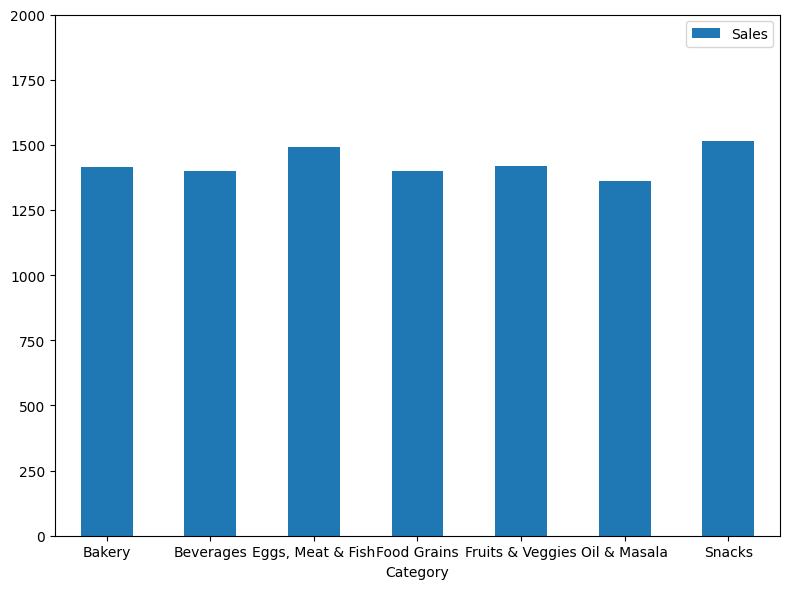

In [29]:
df.pivot_table(values = 'Sales', index = 'Category', aggfunc='count').plot(figsize=(8,6), kind='bar')
plt.ylim(0,2000)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

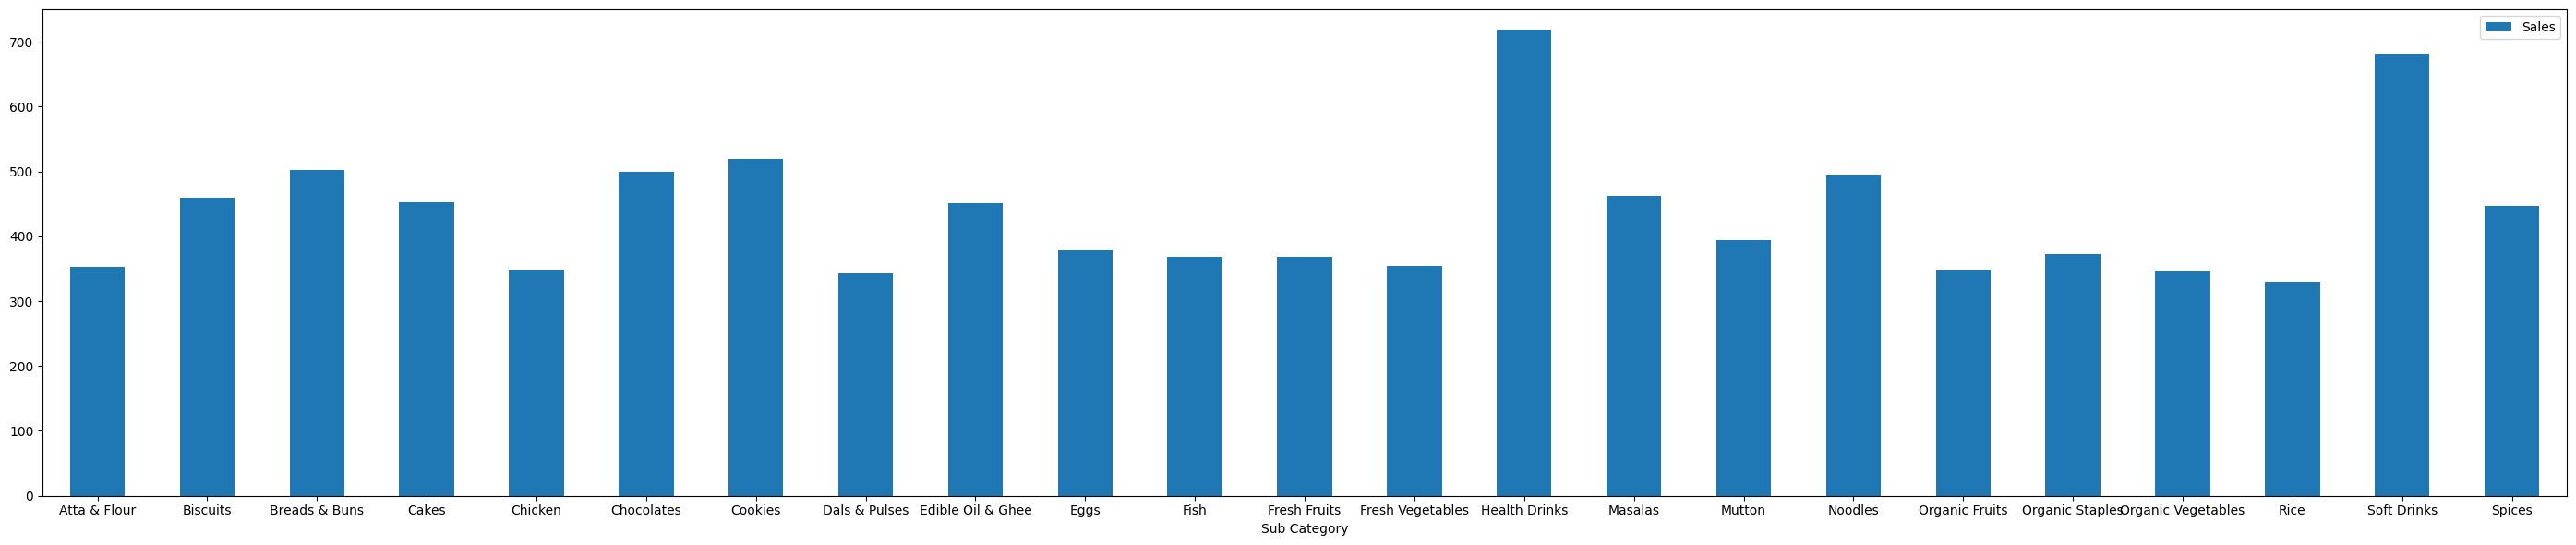

In [49]:
df.pivot_table(values = 'Sales', index = 'Sub Category', aggfunc='count').plot(figsize=(28,6), kind='bar')
plt.ylim(0,750)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Impact of Discount
Here as we can see there is no correlation between profit and discount <br>
but profit and sales are highly correlated<br>
Also it is observed that Discount doesn't affect Sales on a large scale<br>

<Axes: >

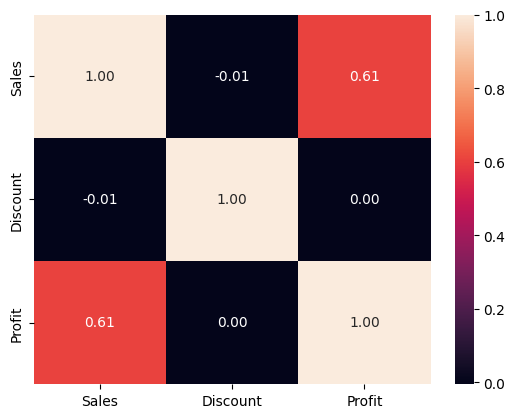

In [50]:
import seaborn as sns
correlation_matrix = df.select_dtypes(['number']).corr()
sns.heatmap(correlation_matrix, annot = True, fmt = '.2f')

# Region wise sales 
here we show sales according to different regions as we can se north has least and South has most sales

<Axes: xlabel='Region', ylabel='Sales'>

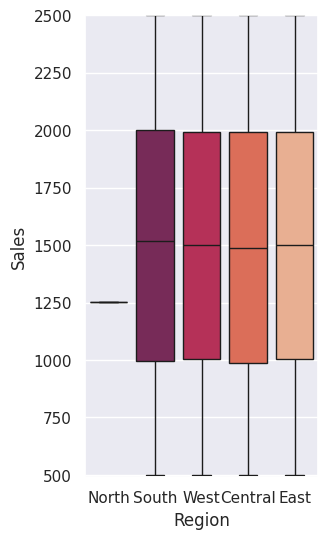

In [66]:
sns.set_theme(rc={'figure.figsize':(3,6)})
plt.ylim(490,2500)
sns.boxplot(x= df['Region'], y = df['Sales'], palette='rocket', hue=df['Region'])

<Axes: xlabel='Month', ylabel='Sales'>

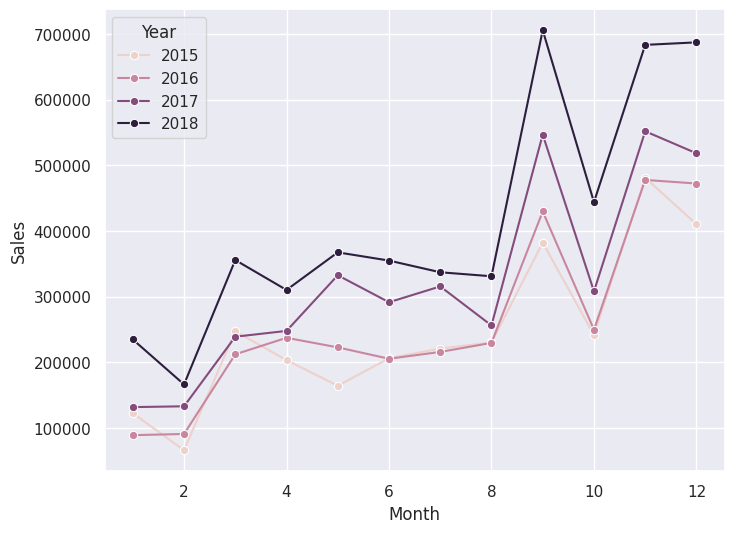

In [70]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format = 'mixed')

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
sns.set_theme(rc={'figure.figsize':(8,6)})

Monthly_Sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

sns.lineplot(data = Monthly_Sales, x = 'Month', y = 'Sales', hue = 'Year', marker ='o')

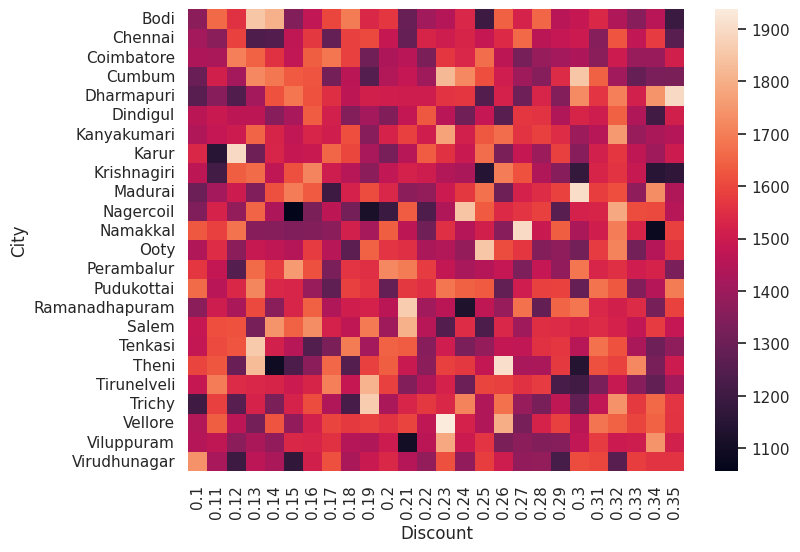

In [72]:
city_discount_sales = df.groupby(['City', 'Discount'])['Sales'].mean().reset_index()
city_discount_sales.pivot(index = 'City', columns = 'Discount', values = 'Sales')
pivot_data = city_discount_sales.pivot(index = 'City', columns = 'Discount', values = 'Sales')
sns.heatmap(data = pivot_data)
plt.show()

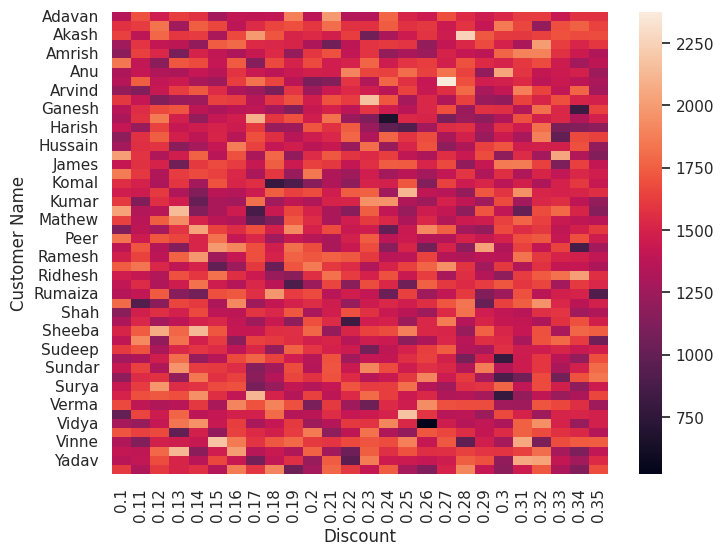

In [76]:
city_discount_sales = df.groupby(['Customer Name', 'Discount'])['Sales'].mean().reset_index()
city_discount_sales.pivot(index = 'Customer Name', columns = 'Discount', values = 'Sales')
pivot_data = city_discount_sales.pivot(index = 'Customer Name', columns = 'Discount', values = 'Sales')
sns.heatmap(data = pivot_data)
plt.show()